In [70]:
import pandas as pd
import numpy as np
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassificationReport

In [71]:
first_machine = next(glob.iglob('../results/*'))
datasets = []
datasetsNames = []
for filepath in glob.iglob(first_machine + '/*/Intersect_dataset.csv'):
    datasetsNames.append(os.path.basename(os.path.dirname(filepath)))
    dataset = pd.read_csv(filepath)
    dataset.columns = dataset.columns.str.strip()
    datasets.append(dataset)
dataset.head()

,range,n1,average1,std1,n2,average2,std2,skewed_1,skewed_2,non_skewed
0,65535,169096,19337.2,21706.3,169096,19337.2,21706.3,4413,2123,177137
1,65535,169096,19337.2,21706.3,46,20595.6,23630.1,41210,350,7478
2,65535,169096,19337.2,21706.3,17648,19492.5,21753.7,2897,607,44847
3,65535,169096,19337.2,21706.3,240934,19336.5,21696.3,4338,3214,633828
4,65535,169096,19337.2,21706.3,3018,19249.9,21904.1,2430,791,15887


In [72]:
feature_cols = ['n1', 'n2']
algos = ['skewed_1', 'skewed_2', 'non_skewed']

In [73]:
def getXs():
    Xs = []
    for dataset in datasets:
        X = dataset.loc[:, feature_cols]
        X = X.values
        Xs.append(X)
    return np.array(Xs)

In [74]:
getXs().shape

(4, 40000, 2)

In [75]:
def getYs():
    ys = []
    for dataset in datasets:
        y = dataset.loc[:, algos]
        y = y.values
        ys.append(y)
    return np.array(ys)

In [76]:
getYs().shape

(4, 40000, 3)

In [77]:
def getClassificationY(ys):
    cy = []
    for algoTimes in ys:
        minVal = float("inf")
        minName = ""
        for i, y in enumerate(algoTimes):    
            if(y < minVal):
                minVal = y
                minName = algos[i]
        cy.append(minName)
    return np.array(cy)

In [78]:
getClassificationY(getYs()[0]).shape

(40000,)

In [79]:
def clfSplit(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=0)

weather_sept_85


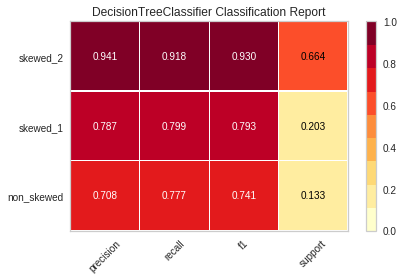

In [91]:
Xs = getXs()
ys = getYs()
i = 2
print(datasetsNames[i])
X_train, X_test, y_train, y_test = clfSplit(Xs[i], getClassificationY(ys[i]))

visualizer = ClassificationReport(DecisionTreeClassifier(max_depth=None, random_state=0), support='percent')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

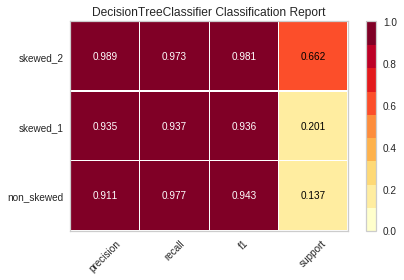

In [89]:
i = 0
j = 2

X = np.concatenate((Xs[2], Xs[2], Xs[2]), axis=0)
y = np.concatenate((getClassificationY(ys[2]), getClassificationY(ys[2]), getClassificationY(ys[2])), axis=0)
v = ClassificationReport(DecisionTreeClassifier(max_depth=None, random_state=0), support='percent')
v.fit(X, y)
v.score(Xs[j], getClassificationY(ys[j]))
v.poof()